# Proyecto 1: Análisis estadístico
Universidad de Antioquia 
Facultad de Ingeniería

Profesores: John Fredy Ochoa Gómez - Juliana Moreno Rada- 
Luisa María Zapata Saldarriaga

#### Presentado por: David Alejandro Henao - Maria Camila Bravo E

# CONTEXTO
## 1.Consultar para enfermedad de Parkinson, Huntington y Esclerosis Lateral Amiotrófica cómo se diagnostican y el reto que existe para el diagnóstico temprano de dichas enfermedades (5%). 

### *Enfermedad de Parkinson (EP)*
El diagnóstico de la enfermedad de Parkinson (PD) se basa en síntomas motores como temblor, lentitud de movimiento y rigidez, pero síntomas no motores pueden aparecer años antes. Una nueva prueba, el "alpha-synuclein seed amplification assay", puede detectar proteínas mal plegadas de sinucleína en el líquido cerebral, permitiendo un diagnóstico antes de los síntomas motores. El principal reto para el diagnóstico temprano es identificar biomarcadores que puedan predecir la enfermedad sin procedimientos invasivos, como la punción lumbar, procedimiento médico en el que se inserta una aguja en la parte baja de la columna vertebral para extraer una muestra de líquido cefalorraquídeo (LCR), el fluido que rodea el cerebro y la médula espinal[1]. 

### *Enfermedad de Huntington (EH)*
Se diagnostica mediante un enfoque multidimensional que incluye la evaluación del historial médico y familiar, exámenes neurológicos, pruebas de laboratorio, imágenes cerebrales (como resonancias magnéticas) y pruebas genéticas que analizan el gen HTT (huntingtina) quien se encuentra en el cromosoma 4 y codifica la proteína huntingtina, que desempeña funciones importantes en el cerebro y en otras partes del cuerpo. La secuencia CAG dentro del gen HTT es una repetición de nucleótidos donde las bases citosina (C), adenina (A) y guanina (G) se repiten en el ADN[. En individuos sanos, el número de repeticiones CAG es generalmente menor a 27. Sin embargo, cuando hay 36 o más repeticiones, se asocia con el desarrollo de la enfermedad de Huntington. El principal reto para el diagnóstico temprano de la EH es la variabilidad de sus síntomas iniciales, que pueden incluir torpeza leve, problemas de equilibrio y cambios en el comportamiento, a menudo confundidos con otros trastornos, algunas personas pueden portar el gen mutante sin mostrar síntomas durante muchos años, lo que complica aún más la detección temprana y la intervención adecuada[2].
### *Esclerosis Lateral Amiotrófica (ELA)*

El diagnóstico de la Esclerosis Lateral Amiotrófica (ELA) se basa en la combinación de la presentación clínica, como debilidad muscular progresiva, fasciculaciones y atrofia, junto con pruebas neurológicas especializadas como la electromiografía (EMG) y estudios de conducción nerviosa para evaluar la función de los nervios y músculos[3]. Uno de los retos del diagnóstico temprano es la necesidad de identificar biomarcadores específicos para una detección más eficaz y rápida. En la actualidad son estudiados biomarcadores como neurofilamentos y TDP-43, para medir el daño en las células nerviosas y mejorar el diagnóstico de ELA en el futuro[4]. La ausencia de un marcador biológico claro, la variabilidad en la presentación de los síntomas y la dificultad para diferenciarla de otros trastornos neuromusculares retrasan el diagnóstico, que a menudo se realiza cuando la enfermedad está más avanzada.


## *2. Discutir matemáticamente, explicando con fórmulas, cómo funciona la rutina detrend de scipy (5%)*

En el análisis de series de tiempo, el detrending es un proceso donde se elimina la tendencia general (lineal o no lineal) de los datos. Su funcionamiento básico consiste en ajustar un modelo polinomial a los datos, que llamaremos y_fit(t), y luego sustraer este modelo de los datos originales y(t). Éste modelo polinomial puede ser de grado p y se expresa como:

### yfit(t)= a + a2t+ a3t2+  .... .... .... + aptp

Siendo (a) los coeficientes del polinomio, que se estiman usando el método de mínimos cuadrados, el cual busca minimizar la suma de los cuadrados de las diferencias entre los valores vistos inicialmente y los valores que hemos ajustado[5].

### **∑i=1|y(ti)-yfit(ti)|^2**

En bioingeniería, el detrending se utiliza para eliminar tendencias no deseadas de
las señales fisiológicas, como en los análisis de EEG, ECG o señales de marcha. 
Esto permite destacar las fluctuaciones reales, ayudando a extraer características más precisas de las señales.


## *3.Discutir matemáticamente, explicando con fórmulas, cómo funciona el filtro hampel (5%)*

El filtro de Hampel es una herramienta muy útil cuando trabajamos con datos que contienen errores o valores extremos atípicos (outliers). A diferencia de otros métodos que pueden ser engañados por estos valores atípicos, el filtro de Hampel es muy resistente a ellos. Esto se debe a que utiliza la mediana y la desviación absoluta de la mediana (MAD), dos medidas estadísticas que no se ven tan afectadas por valores extremos como el promedio y la desviación estándar. Gracias a su robustez, el filtro de Hampel nos permite obtener resultados más fiables y precisos en una amplia variedad de aplicaciones[6].

### FUNCIONAMIENTO DEL FILTRO:

Matemáticamente, el filtro se basa en el uso de la mediana y la desviación absoluta mediana (MAD) para identificar valores atípicos. Dado un conjunto de datos x1,x2,...,xn​, se calcula la mediana m de una ventana de tamaño k que rodea a cada observación. Por ende el primer paso será definir dicha ventana con N puntos alrededor de cada punto xi. Luego se calcula la mediana M de los valores de la ventana deslizante alrededor de xi.

Ahora, la MAD se calcula así : 

#### MAD = M(|xi-M(x)|)

Si una observación xi​ se encuentra a una distancia mayor que un umbral t×MADt respecto a la mediana, se considera un outlier y se reemplaza por la mediana de la ventana, si no lo es se deja el valor original.
x'i=Mi​ ​​si ∣xi​−Mi​∣>τ⋅MAD     ó      x'i=xi si no es un outlier  

### Ejemplo numérico
Supongamos que tenemos la siguiente serie de datos x=[,1,1,10,1,1,1] y aplicamos un filtro de Hampel con una ventana de tamaño N=3.
Para x4=10 la ventana sería [1,1,10].
La mediana M4 es 1.
La MAD sería:
MAD4=mediana(∣1−1∣,∣1−1∣,∣10−1∣)=0 4.
 Para un τ=3, x4=10 se consideraría un outlier, ya que ∣10−1∣=9 3⋅0.
Entonces, se reemplaza x4=10 M4​=1.
El resultado final sería x′=[1,1,1,1,1,1,1].

## *4.Discutir matemáticamente y desde la bioingeniería qué mide la entropía de permutación.   (5%)*

La entropía de permutación (PE) mide la complejidad y el grado de aleatoriedad en una serie temporal analizando el orden relativo de sus valores. Matemáticamente, se basa en la entropía de Shannon, se calcula a partir de la distribución de patrones ordinales en una serie temporal. Primero, se particiona la serie en vectores de dimensión D y retardo ꞇ, creando una matriz de vectores solapados. Luego, se asigna un patrón ordinal a cada vector, que corresponde a la permutación de los valores en función de su orden relativo. La frecuencia de cada permutación se utiliza para calcular la probabilidad pi​ asociada a cada patrón. La PE se define como la entropía de Shannon de estas probabilidades:


#### *Desde la bioingeniería, la PE es útil para el análisis de señales fisiológicas (como EEG, ECG, y señales respiratorias), ya que muchas de estas señales son no lineales y altamente complejas. La PE captura los patrones ordinales presentes en estas señales, permitiendo distinguir entre estados fisiológicos normales y patológicos. Por ejemplo:*
- En un EEG, un valor bajo de PE podría indicar una señal determinista, como durante un estado de sueño profundo, mientras que un valor alto podría reflejar mayor aleatoriedad, como en el caso de un episodio epiléptico.
- En señales respiratorias, la PE puede utilizarse para identificar la complejidad de la respiración y detectar enfermedades como la EPOC.

Además en el análisis de señales de marcha, la entropía de permutación puede identificar cambios en la regulación del movimiento en pacientes con enfermedades neurodegenerativas o en la predicción de caídas en adultos mayores. Al cuantificar la variabilidad en las secuencias de datos, se pueden inferir aspectos sobre la salud y el funcionamiento del sistema neuromuscular, contribuyendo así a diagnósticos más precisos y a la personalización de tratamientos[8].

# ****DESARROLLO DEL CÓDIGO****

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
from scipy.io import loadmat
from scipy.fftpack import fft
from scipy.signal import detrend
from scipy.stats import shapiro , levene
from scipy.stats import mannwhitneyu
import os



# Extracción de los datos


## ELA

In [69]:
# Definir los nombres de las columnas
names = [
    'Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)',
    'Left Swing Interval (sec)', 'Right Swing Interval (sec)', 'Left Swing Interval (% of stride)',
    'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)',
    'Left Stance Interval (% of stride)', 'Right Stance Interval (% of stride)',
    'Double Support Interval (sec)', 'Double Support Interval (% of stride)'
]

# Crear un diccionario para almacenar los datos
data_dict_ELA = {}

# Ruta donde se encuentran los archivos .ts
ruta_archivos_ela = 'ELA'

# Recorrer los archivos als1.ts a als13.ts
for i in range(1, 14):
    archivo_ela = f'als{i}.ts'
    ruta_completa_ela = os.path.join(ruta_archivos_ela, archivo_ela)
    
    # Leer el archivo y almacenarlo en el diccionario
    datos = pd.read_csv(ruta_completa_ela, delimiter='\t', names=names)
    
    # Almacenar los datos en el diccionario, usando como clave el nombre del archivo (ej. 'als1')
    data_dict_ELA[f'als{i}'] = datos

# Mostrar las claves del diccionario para verificar
print(data_dict_ELA.keys())


dict_keys(['als1', 'als2', 'als3', 'als4', 'als5', 'als6', 'als7', 'als8', 'als9', 'als10', 'als11', 'als12', 'als13'])


#### Ahora generamos la función cargar_señales, que permite extraer las 4 selaes de interés y luego las almacenamos como arreglos en una lista --> datos_ELA

In [70]:
def cargar_señales(ruta_archivo): 
    # Leer el archivo .ts
    datos = pd.read_csv(ruta_archivo, delimiter='\t', names=names)
    # Extraer las columnas de interés
    señales_interes = datos[['Elapsed Time (sec)','Left Stride Interval (sec)', 'Right Stride Interval (sec)',
                             'Left Swing Interval (sec)', 'Right Swing Interval (sec)']]
    # Convertirlas a un ndarray de NumPy
    señales_ndarray = señales_interes.to_numpy()
    return señales_ndarray

# Crear una lista para almacenar los ndarrays de las señales ELA
datos_ELA = []

for i in range(1, 14):
    archivo = f'als{i}.ts'
    ruta_completa_ela = os.path.join(ruta_archivos_ela, archivo)
    
    # Cargar las señales de interés y almacenarlas en la lista
    señales = cargar_señales(ruta_completa_ela)
    datos_ELA.append(señales)

print(f'Se han cargado {len(datos_ELA)} señales de ELA con los cuatro contenidos de interés.')


Se han cargado 13 señales de ELA con los cuatro contenidos de interés.


# HUNTINGTON

In [71]:
# Crear un diccionario para almacenar los datos
data_dict_HUNT = {}

# Ruta donde se encuentran los archivos .ts
ruta_archivos_hunt = 'Huntington'

# Recorrer los archivos als1.ts a als13.ts
for i in range(1, 21):
    archivo = f'hunt{i}.ts'
    ruta_completa_hunt = os.path.join(ruta_archivos_hunt, archivo)
    
    # Leer el archivo y almacenarlo en el diccionario
    datos = pd.read_csv(ruta_completa_hunt, delimiter='\t', names=names)
    
    # Almacenar los datos en el diccionario, usando como clave el nombre del archivo (ej. 'als1')
    data_dict_HUNT[f'hunt{i}'] = datos

# Mostrar las claves del diccionario para verificar
print(data_dict_HUNT.keys())

dict_keys(['hunt1', 'hunt2', 'hunt3', 'hunt4', 'hunt5', 'hunt6', 'hunt7', 'hunt8', 'hunt9', 'hunt10', 'hunt11', 'hunt12', 'hunt13', 'hunt14', 'hunt15', 'hunt16', 'hunt17', 'hunt18', 'hunt19', 'hunt20'])


#### Extracción de las 4 señales de interés y luego las almacenamos como arreglos en una lista --> datos_Huntington 

In [72]:
datos_Huntington = []
# Recorrer los archivos als1.ts a als8.ts
for i in range(1, 21):
    archivo = f'hunt{i}.ts'
    ruta_completa_hunt = os.path.join(ruta_archivos_hunt, archivo)
    
    # Cargar las señales de interés y almacenarlas en la lista
    señales = cargar_señales(ruta_completa_hunt)
    datos_Huntington.append(señales)

# Mostrar la cantidad de ndarrays almacenados en datos_ELA para verificar
print(f'Se han cargado {len(datos_Huntington)} señales de Huntington con los cuatro contenidos de interés.')
datos_Huntington

Se han cargado 20 señales de Huntington con los cuatro contenidos de interés.


[array([[ 21.5167,   0.9033,   0.88  ,   0.3567,   0.3567],
        [ 22.3733,   0.8567,   0.8933,   0.34  ,   0.3367],
        [ 23.3233,   0.95  ,   0.9   ,   0.38  ,   0.3767],
        ...,
        [297.83  ,   0.8833,   0.8833,   0.3467,   0.3433],
        [298.7033,   0.8733,   0.8533,   0.3467,   0.34  ],
        [299.59  ,   0.8867,   0.8733,   0.3367,   0.3267]]),
 array([[ 23.4733,   1.47  ,   1.4133,   0.4667,   0.57  ],
        [ 25.0233,   1.55  ,   1.49  ,   0.5033,   0.51  ],
        [ 26.52  ,   1.4967,   1.51  ,   0.4967,   0.5167],
        ...,
        [297.1033,   1.2267,   1.2333,   0.41  ,   0.41  ],
        [298.2433,   1.14  ,   1.1467,   0.41  ,   0.39  ],
        [299.3533,   1.11  ,   1.1433,   0.3367,   0.3467]]),
 array([[2.180670e+01, 1.123300e+00, 1.033300e+00, 4.133000e-01,
         3.467000e-01],
        [2.281000e+01, 1.003300e+00, 1.076700e+00, 3.433000e-01,
         3.700000e-01],
        [2.367670e+01, 8.667000e-01, 9.300000e-01, 2.633000e-01,
       

# PARKINSON

In [73]:
# Crear un diccionario para almacenar los datos
data_dict_Park = {}

# Ruta donde se encuentran los archivos .ts
ruta_archivos_park = 'Parkinson'

# Recorrer los archivos als1.ts a als13.ts
for i in range(1, 16):
    archivo = f'park{i}.ts'
    ruta_completa_park = os.path.join(ruta_archivos_park, archivo)
    
    # Leer el archivo y almacenarlo en el diccionario
    datos = pd.read_csv(ruta_completa_park, delimiter='\t', names=names)
    
    # Almacenar los datos en el diccionario, usando como clave el nombre del archivo (ej. 'als1')
    data_dict_Park[f'park{i}'] = datos

# Mostrar las claves del diccionario para verificar
print(data_dict_Park.keys())


dict_keys(['park1', 'park2', 'park3', 'park4', 'park5', 'park6', 'park7', 'park8', 'park9', 'park10', 'park11', 'park12', 'park13', 'park14', 'park15'])


#### Extracción de las 4 selaes de interés y luego las almacenamos como arreglos en una lista --> datos_Parkinson

In [74]:
datos_Parkinson = []

# Recorrer los archivos als1.ts a als8.ts
for i in range(1, 16):
    archivo = f'park{i}.ts'
    ruta_completa_park = os.path.join(ruta_archivos_park, archivo)
    
    # Cargar las señales de interés y almacenarlas en la lista
    señales = cargar_señales(ruta_completa_park)
    datos_Parkinson.append(señales)

# Mostrar la cantidad de ndarrays almacenados en datos_ELA para verificar
print(f'Se han cargado {len(datos_Parkinson)} señales de Parkinson con los cuatro contenidos de interés.')
datos_Parkinson


Se han cargado 15 señales de Parkinson con los cuatro contenidos de interés.


[array([[ 21.77  ,   1.1333,   1.0933,   0.37  ,   0.33  ],
        [ 22.8767,   1.1067,   1.12  ,   0.38  ,   0.35  ],
        [ 24.0833,   1.2067,   1.1467,   0.4467,   0.38  ],
        ...,
        [296.2567,   1.08  ,   1.1267,   0.3867,   0.3367],
        [297.3667,   1.11  ,   1.1067,   0.4   ,   0.35  ],
        [298.5   ,   1.1333,   1.0733,   0.4367,   0.3167]]),
 array([[ 22.32  ,   0.9767,   1.0067,   0.38  ,   0.3733],
        [ 23.2767,   0.9567,   0.9767,   0.3633,   0.3667],
        [ 24.2633,   0.9867,   0.97  ,   0.3733,   0.3667],
        ...,
        [297.82  ,   1.0333,   1.0067,   0.3967,   0.3767],
        [298.8233,   1.0033,   1.0233,   0.3767,   0.37  ],
        [299.81  ,   0.9867,   0.9933,   0.3767,   0.3667]]),
 array([[ 22.55  ,   1.1467,   1.13  ,   0.4067,   0.34  ],
        [ 23.7467,   1.1967,   1.1767,   0.4167,   0.36  ],
        [ 24.9433,   1.1967,   1.1867,   0.4   ,   0.34  ],
        ...,
        [297.03  ,   1.1467,   1.1367,   0.3933,   0.3533

# Control


In [75]:
# Crear un diccionario para almacenar los datos
data_dict_Control = {}

# Ruta donde se encuentran los archivos .ts
ruta_archivos_c = 'Control'

# Recorrer los archivos als1.ts a als13.ts
for i in range(1, 17):
    archivo = f'control{i}.ts'
    ruta_completa_c = os.path.join(ruta_archivos_c, archivo)
    
    # Leer el archivo y almacenarlo en el diccionario
    datos = pd.read_csv(ruta_completa_c, delimiter='\t', names=names)
    
    # Almacenar los datos en el diccionario, usando como clave el nombre del archivo (ej. 'als1')
    data_dict_Control[f'control{i}'] = datos

# Mostrar las claves del diccionario para verificar
print(data_dict_Control.keys())

dict_keys(['control1', 'control2', 'control3', 'control4', 'control5', 'control6', 'control7', 'control8', 'control9', 'control10', 'control11', 'control12', 'control13', 'control14', 'control15', 'control16'])


#### Extracción de las 4 señaes de interés y luego las almacenamos como arreglos en una lista --> datos_Control

In [76]:
datos_Control = []

# Recorrer los archivos als1.ts a als8.ts
for i in range(1, 17):
    archivo = f'control{i}.ts'
    ruta_completa_c = os.path.join(ruta_archivos_c, archivo)
    
    # Cargar las señales de interés y almacenarlas en la lista
    señales = cargar_señales(ruta_completa_c)
    datos_Control.append(señales)

# Mostrar la cantidad de ndarrays almacenados en datos_ELA para verificar
print(f'Se han cargado {len(datos_Control)} señales de Control con los cuatro contenidos de interés.')
datos_Control

Se han cargado 16 señales de Control con los cuatro contenidos de interés.


[array([[ 21.93  ,   1.0667,   1.06  ,   0.3633,   0.3833],
        [ 23.0167,   1.0867,   1.0733,   0.3833,   0.3967],
        [ 24.0633,   1.0467,   1.0733,   0.3633,   0.39  ],
        ...,
        [296.5133,   1.0367,   1.09  ,   0.3267,   0.3933],
        [297.56  ,   1.0467,   1.0367,   0.3433,   0.35  ],
        [298.6   ,   1.04  ,   1.0467,   0.3167,   0.3867]]),
 array([[ 21.7667,   1.17  ,   1.1867,   0.46  ,   0.4667],
        [ 22.93  ,   1.1633,   1.15  ,   0.46  ,   0.4533],
        [ 24.12  ,   1.19  ,   1.19  ,   0.4567,   0.47  ],
        ...,
        [296.8667,   1.1733,   1.1567,   0.48  ,   0.4433],
        [298.0867,   1.22  ,   1.2167,   0.4833,   0.4833],
        [299.3333,   1.2467,   1.2   ,   0.5167,   0.4533]]),
 array([[2.228670e+01, 1.113300e+00, 1.126700e+00, 4.067000e-01,
         3.600000e-01],
        [2.335670e+01, 1.070000e+00, 1.090000e+00, 3.900000e-01,
         3.467000e-01],
        [2.448000e+01, 1.123300e+00, 1.086700e+00, 4.033000e-01,
       

# 2. Eliminamos los errores en Rutina usando el detrend

In [77]:
def aplicar_detrend(lista_señales):
    lista_señales_detrended = []
    for señales in lista_señales:
        # Separar la columna de tiempo (primera columna)
        tiempo = señales[:, 0]  # Columna de tiempo
        señales_sin_tiempo = señales[:, 1:]  # Resto de columnas (señales)
        # Aplicar detrend a las señales, excluyendo la columna de tiempo
        señales_detrended = detrend(señales_sin_tiempo, axis=0)
        # Volver a unir la columna de tiempo con las señales detrended
        señales_con_tiempo_detrended = np.column_stack((tiempo, señales_detrended))

        # Almacenar en la lista de datos detrended
        lista_señales_detrended.append(señales_con_tiempo_detrended)

    return lista_señales_detrended


#### Realizamos el detrend para todas las señales con la función anterior y guardamos los valores con detrend en las nuevas listas.

In [78]:
datos_ELA_Detrended = aplicar_detrend(datos_ELA)
datos_Huntington_Detrended = aplicar_detrend(datos_Huntington)
datos_Parkinson_Detrended = aplicar_detrend(datos_Parkinson)
datos_Control_Detrended = aplicar_detrend(datos_Control)

# 3. Filtro Hampel para cada señal

In [79]:
# Filtro de Hampel
def hampelfilter(signal: np.ndarray, w: int, sigma: int) -> np.ndarray:
    yk = np.copy(signal)  # Inicializa la señal filtrada (copia de la original)
    
    for i in range(w, len(signal) - w):
        ventana = signal[i - w:i + w + 1]
        ref = np.median(ventana)  # Calcula la mediana de la ventana.
        AbsDev = abs(ventana - ref)
        MAD = 1.4826 * np.median(AbsDev)  # Calcula el MAD para la ventana.
        
        TestVal = abs(signal[i] - ref)  # Diferencia del punto con la mediana.
        
        # Reemplaza el valor por la mediana si excede sigma * MAD
        if TestVal > sigma * MAD:
            yk[i] = ref

    return yk

# Aplicar filtro de Hampel a cada señal en la lista de ndarrays
def aplicar_hampel_lista_señales(lista_señales, w=5, sigma=3):
   
    lista_filtrada = []

    for señales in lista_señales:
        # Separar la columna de tiempo (primera columna)
        tiempo = señales[:, 0]
        señales_sin_tiempo = señales[:, 1:]

        # Aplicar el filtro de Hampel a cada columna de señales
        señales_filtradas = np.apply_along_axis(hampelfilter, 0, señales_sin_tiempo, w, sigma)

        # Volver a unir la columna de tiempo con las señales filtradas
        señales_con_tiempo_filtradas = np.column_stack((tiempo, señales_filtradas))

        # Agregar a la lista filtrada
        lista_filtrada.append(señales_con_tiempo_filtradas)

    return lista_filtrada


In [80]:
datos_ELA_filtrados = aplicar_hampel_lista_señales(datos_ELA_Detrended,w=5,sigma=3)
datos_Huntington_filtrados = aplicar_hampel_lista_señales(datos_Huntington_Detrended,w=5,sigma=3)
datos_Parkinson_filtrados = aplicar_hampel_lista_señales(datos_Parkinson_Detrended,w=5,sigma=3)
datos_Control_filtrados = aplicar_hampel_lista_señales(datos_Control_Detrended,w=5,sigma=3)

### En la siguiente figura veremos un ejemplo de como queda la seña filtrada en la parte superior, la señals solo conel detrend en el medio, y la señal original abajo


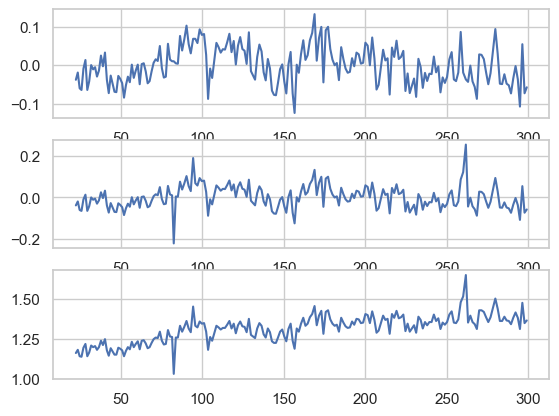

In [81]:
fig, axs = plt.subplots(3,1)
time = datos_ELA_filtrados[8][:,0]
y1 = datos_ELA_filtrados[8][:,1]
y2 =datos_ELA_Detrended[8][:,1]
y3 = datos_ELA[8][:,1]
axs[0].plot(time, y1)
axs[1].plot(time, y2)
axs[2].plot(time,y3)

plt.show()

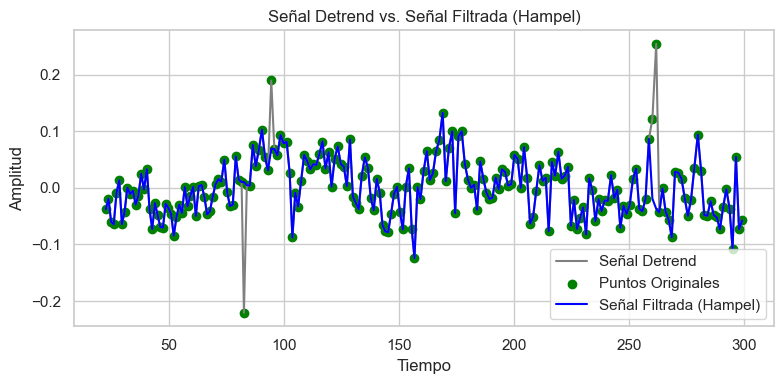

In [82]:
import matplotlib.pyplot as plt
y_hampel= datos_ELA_filtrados[8][:,1]
y_original = datos_ELA_Detrended[8][:,1]

fig, ax = plt.subplots(figsize=(8, 4))

# señal original
ax.plot(time, y_original, label='Señal Detrend', color='gray')
ax.scatter(time, y_original, color='green', label='Puntos Originales')  # Puntos 
# señal filtrada con Hampel
ax.plot(time, y_hampel, label='Señal Filtrada (Hampel)', color='blue')

ax.set_title('Señal Detrend vs. Señal Filtrada (Hampel)')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Amplitud')
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


# 4. Crear una función que reciba una señal de marcha y calcule el coeficiente de variación (CV) y la SD

In [83]:
import numpy as np

def calculate_cv_sd(signal):  #Calcula el coeficiente de variación (CV) y la desviación estándar (SD)
   
    mean_val = np.abs(np.mean(signal))
    sd_val = np.std(signal)
    
    # Evitar división por cero:
    if mean_val == 0:
        cv_val = 0
    else:
        cv_val = 100 * (sd_val / mean_val)  # CV expresado como % 
    
    return cv_val, sd_val

def calcular_cv_sd_lista(lista_señales):

    resultados_lista = []

    for señales in lista_señales:
        # Separación de columnas
        señales_sin_tiempo = señales[:, 1:]  # Excluir la columna de tiempo

        # Calcular CV y SD para cada columna de señales de marcha (Stride, Swing, etc.)
        resultados_senal = []
        for señal in señales_sin_tiempo.T:  # Transponer para iterar sobre cada señal
            cv_val, sd_val = calculate_cv_sd(señal)
            resultados_senal.extend([cv_val, sd_val])  # Añadir CV y SD a la lista de resultados
        
        # Añadir los resultados de este archivo a la lista
        resultados_lista.append(resultados_senal)

    # Convertir la lista de resultados en un array NumPy
    ndarray_resultados = np.array(resultados_lista)

    return ndarray_resultados


In [84]:
datos_cv_sd_ELA = calcular_cv_sd_lista(datos_ELA_filtrados)
datos_cv_sd_Hunt = calcular_cv_sd_lista(datos_Huntington_filtrados)
datos_cv_sd_Park = calcular_cv_sd_lista(datos_Parkinson_filtrados)
datos_cv_sd_Control = calcular_cv_sd_lista(datos_Control_filtrados)

## 5.Crear una función que reciba una señal de marcha y permita calcular la entropía de permutación

In [85]:
import numpy as np
import math
from collections import Counter

def calculate_permutation_entropy(time_series, D, tau):
    column_matrix = []
    
    # Crear la matriz de vectores columna
    for i in range(len(time_series) - (D - 1) * tau):
        column_vector = [time_series[i + j * tau] for j in range(D)]
        column_matrix.append(column_vector)

    # Generar las permutaciones
    permutations = []
    for column_vector in column_matrix:
        permutation = sorted(range(len(column_vector)), key=lambda k: column_vector[k])
        permutations.append(tuple(permutation))

    # Calcular las frecuencias relativas
    relative_frequencies = Counter(permutations)
    total_permutations = len(permutations)
    for permutation in relative_frequencies:
        relative_frequencies[permutation] /= total_permutations

    # Calcular la entropía de permutación
    PE = -np.sum(f * math.log(f, D) for f in relative_frequencies.values())

    return PE

def calcular_entropia_permutacion_lista(lista_señales, D=3, tau=1):
    resultados_lista = []

    for señales in lista_señales:
        # Separar la columna de tiempo (primera columna) de las señales de marcha
        señales_sin_tiempo = señales[:, 1:]  # Excluir la columna de tiempo

        # Calcular la entropía de permutación para cada columna de señales de marcha
        resultados_senal = []
        for señal in señales_sin_tiempo.T:  # Transponer para iterar sobre cada señal
            PE = calculate_permutation_entropy(señal, D, tau)
            resultados_senal.append(PE)  # Añadir la entropía a la lista de resultados
        
        # Añadir los resultados de este archivo a la lista
        resultados_lista.append(resultados_senal)

    # Convertir la lista de resultados en un array NumPy
    ndarray_entropias = np.array(resultados_lista)

    return ndarray_entropias


In [86]:
datos_ELA_entropia = calcular_entropia_permutacion_lista(datos_ELA_filtrados)
datos_Huntington_entropia = calcular_entropia_permutacion_lista(datos_Huntington_filtrados)
datos_Parkinson_entropia = calcular_entropia_permutacion_lista(datos_Parkinson_filtrados)
datos_Control_entropia = calcular_entropia_permutacion_lista(datos_Control_filtrados)

/var/folders/11/9sh1kxmj38570z2lx7xfscbc0000gn/T/ipykernel_81878/1102509370.py:26: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  PE = -np.sum(f * math.log(f, D) for f in relative_frequencies.values())


# 6. dataframe donde se pueda discriminar nombre participante, condición (Parkinson, Huntington, ELA, Control) y los tres índices/características calculados por cada señal

In [87]:
def crear_dataframe(datos_cv_sd, datos_entropia, sujetos, condicion):
 
    data = []
    
    for i in range(len(sujetos)):
        fila = [
            sujetos[i],                    # Nombre del sujeto
            condicion,                     # Condición (ej. ELA)
            datos_entropia[i][0],          # Entropía Left Stride Interval
            datos_cv_sd[i][0],             # CV Left Stride Interval
            datos_cv_sd[i][1],             # SD Left Stride Interval
            datos_entropia[i][1],          # Entropía Right Stride Interval
            datos_cv_sd[i][2],             # CV Right Stride Interval
            datos_cv_sd[i][3],             # SD Right Stride Interval
            datos_entropia[i][2],          # Entropía Left Swing Interval
            datos_cv_sd[i][4],             # CV Left Swing Interval
            datos_cv_sd[i][5],             # SD Left Swing Interval
            datos_entropia[i][3],          # Entropía Right Swing Interval
            datos_cv_sd[i][6],             # CV Right Swing Interval
            datos_cv_sd[i][7]              # SD Right Swing Interval
        ]
        
        data.append(fila)
    
    # Definir nombres de las columnas del DataFrame
    columnas = [
        'Subject', 'Condition', 
        'Entropy_Left Stride', 'CV_Left Stride ', 'SD_Left Stride ', 
        'Entropy_Right Stride ', 'CV_Right Stride ', 'SD_Right Stride ',
        'Entropy_Left Swing ', 'CV_Left Swing ', 'SD_Left Swing ', 
        'Entropy_Right Swing ', 'CV_Right Swing ', 'SD_Right Swing '
    ]
    
    # Crear el DataFrame
    df = pd.DataFrame(data, columns=columnas)
    
    return df

### DataFrame para ELA

In [88]:
sujetos_ela = [f'als{i+1}' for i in range(13)]
condicion_ela = 'ELA'

# Crear el DataFrame
df_ela = crear_dataframe(datos_cv_sd_ELA, datos_ELA_entropia, sujetos_ela, condicion_ela)
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)        # Ajusta el ancho para evitar que se corte

# Imprimir el DataFrame nuevamente
print(df_ela)

   Subject Condition  Entropy_Left Stride  CV_Left Stride   SD_Left Stride   Entropy_Right Stride   CV_Right Stride   SD_Right Stride   Entropy_Left Swing   CV_Left Swing   SD_Left Swing   Entropy_Right Swing   CV_Right Swing   SD_Right Swing 
0     als1       ELA             1.621994       257.890845         0.081399               1.605690        324.585065          0.087228             1.624007     9862.168321        0.039024              1.625859      9235.162730         0.025510
1     als2       ELA             1.616908      9731.807642         0.019907               1.595105       2046.109600          0.019122             1.622933     2363.084771        0.011713              1.624013       842.146412         0.016503
2     als3       ELA             1.615509       127.176593         0.064963               1.628522         95.489886          0.054700             1.625378    10033.624779        0.046087              1.620423     14297.491259         0.039715
3     als4       ELA    

### DataFrame para Huntington

In [89]:
sujetos_hunt = [f'hunt{i+1}' for i in range(20)]
condicion_hunt = 'Huntington'

# Crear el DataFrame
df_hunt = crear_dataframe(datos_cv_sd_Hunt, datos_Huntington_entropia, sujetos_hunt, condicion_hunt)
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)        # Ajusta el ancho para evitar que se corte

# Imprimir el DataFrame nuevamente
print(df_hunt)

   Subject   Condition  Entropy_Left Stride  CV_Left Stride   SD_Left Stride   Entropy_Right Stride   CV_Right Stride   SD_Right Stride   Entropy_Left Swing   CV_Left Swing   SD_Left Swing   Entropy_Right Swing   CV_Right Swing   SD_Right Swing 
0    hunt1  Huntington             1.624662      1769.142954         0.039483               1.627947      1.375378e+03          0.040374             1.600432     6570.756411        0.027593              1.629680     7.936765e+03         0.024939
1    hunt2  Huntington             1.626088      1467.254750         0.077381               1.622916      2.731527e+03          0.076460             1.627920     5595.332173        0.032985              1.623909     4.633171e+03         0.044231
2    hunt3  Huntington             1.621713     10246.735989         0.104359               1.627256      7.533127e+02          0.097794             1.628123     1385.628200        0.055309              1.626255     6.580248e+03         0.069730
3    hunt4  Hunt

### DataFrame para Parkinson

In [90]:
sujetos_park = [f'park{i+1}' for i in range(15)]
condicion_park = 'Parkinson'

# Crear el DataFrame
df_park = crear_dataframe(datos_cv_sd_Park, datos_Parkinson_entropia, sujetos_park, condicion_park)
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)        # Ajusta el ancho para evitar que se corte

# Imprimir el DataFrame nuevamente
print(df_park)

   Subject  Condition  Entropy_Left Stride  CV_Left Stride   SD_Left Stride   Entropy_Right Stride   CV_Right Stride   SD_Right Stride   Entropy_Left Swing   CV_Left Swing   SD_Left Swing   Entropy_Right Swing   CV_Right Swing   SD_Right Swing 
0    park1  Parkinson             1.628252      7213.060355         0.039965               1.629155      15263.019333          0.041220             1.622833      561.955496        0.025162              1.622502      1070.717404         0.036421
1    park2  Parkinson             1.620657     13475.755435         0.054590               1.580952       2124.315279          0.048248             1.604710     4211.227672        0.016740              1.623563      1065.687754         0.021912
2    park3  Parkinson             1.622894       593.927319         0.070925               1.629747       1361.556469          0.097494             1.623479     1969.368517        0.023438              1.623209      9989.656754         0.031726
3    park4  Parkinso

### DataFrame para Control

In [91]:
sujetos_control = [f'control{i+1}' for i in range(16)]
condicion_control = 'Control'

# Crear el DataFrame
df_control = crear_dataframe(datos_cv_sd_Control, datos_Control_entropia, sujetos_control, condicion_control)
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)        # Ajusta el ancho para evitar que se corte

# Imprimir el DataFrame nuevamente



In [92]:
print(df_control)

      Subject Condition  Entropy_Left Stride  CV_Left Stride   SD_Left Stride   Entropy_Right Stride   CV_Right Stride   SD_Right Stride   Entropy_Left Swing   CV_Left Swing   SD_Left Swing   Entropy_Right Swing   CV_Right Swing   SD_Right Swing 
0    control1   Control             1.609136      2541.428592         0.032673               1.628940       3592.245457          0.031323             1.628070      784.705679        0.017974              1.619731      3152.026270         0.017326
1    control2   Control             1.617451       330.561036         0.035726               1.616484        718.918329          0.035454             1.601335     3300.333332        0.018268              1.623778      1216.875413         0.018220
2    control3   Control             1.600147     29878.896973         0.028789               1.621370       6629.053818          0.033704             1.604733     4194.300604        0.015279              1.594568      1802.620692         0.013864
3    control

# 7. GRAFICOS 

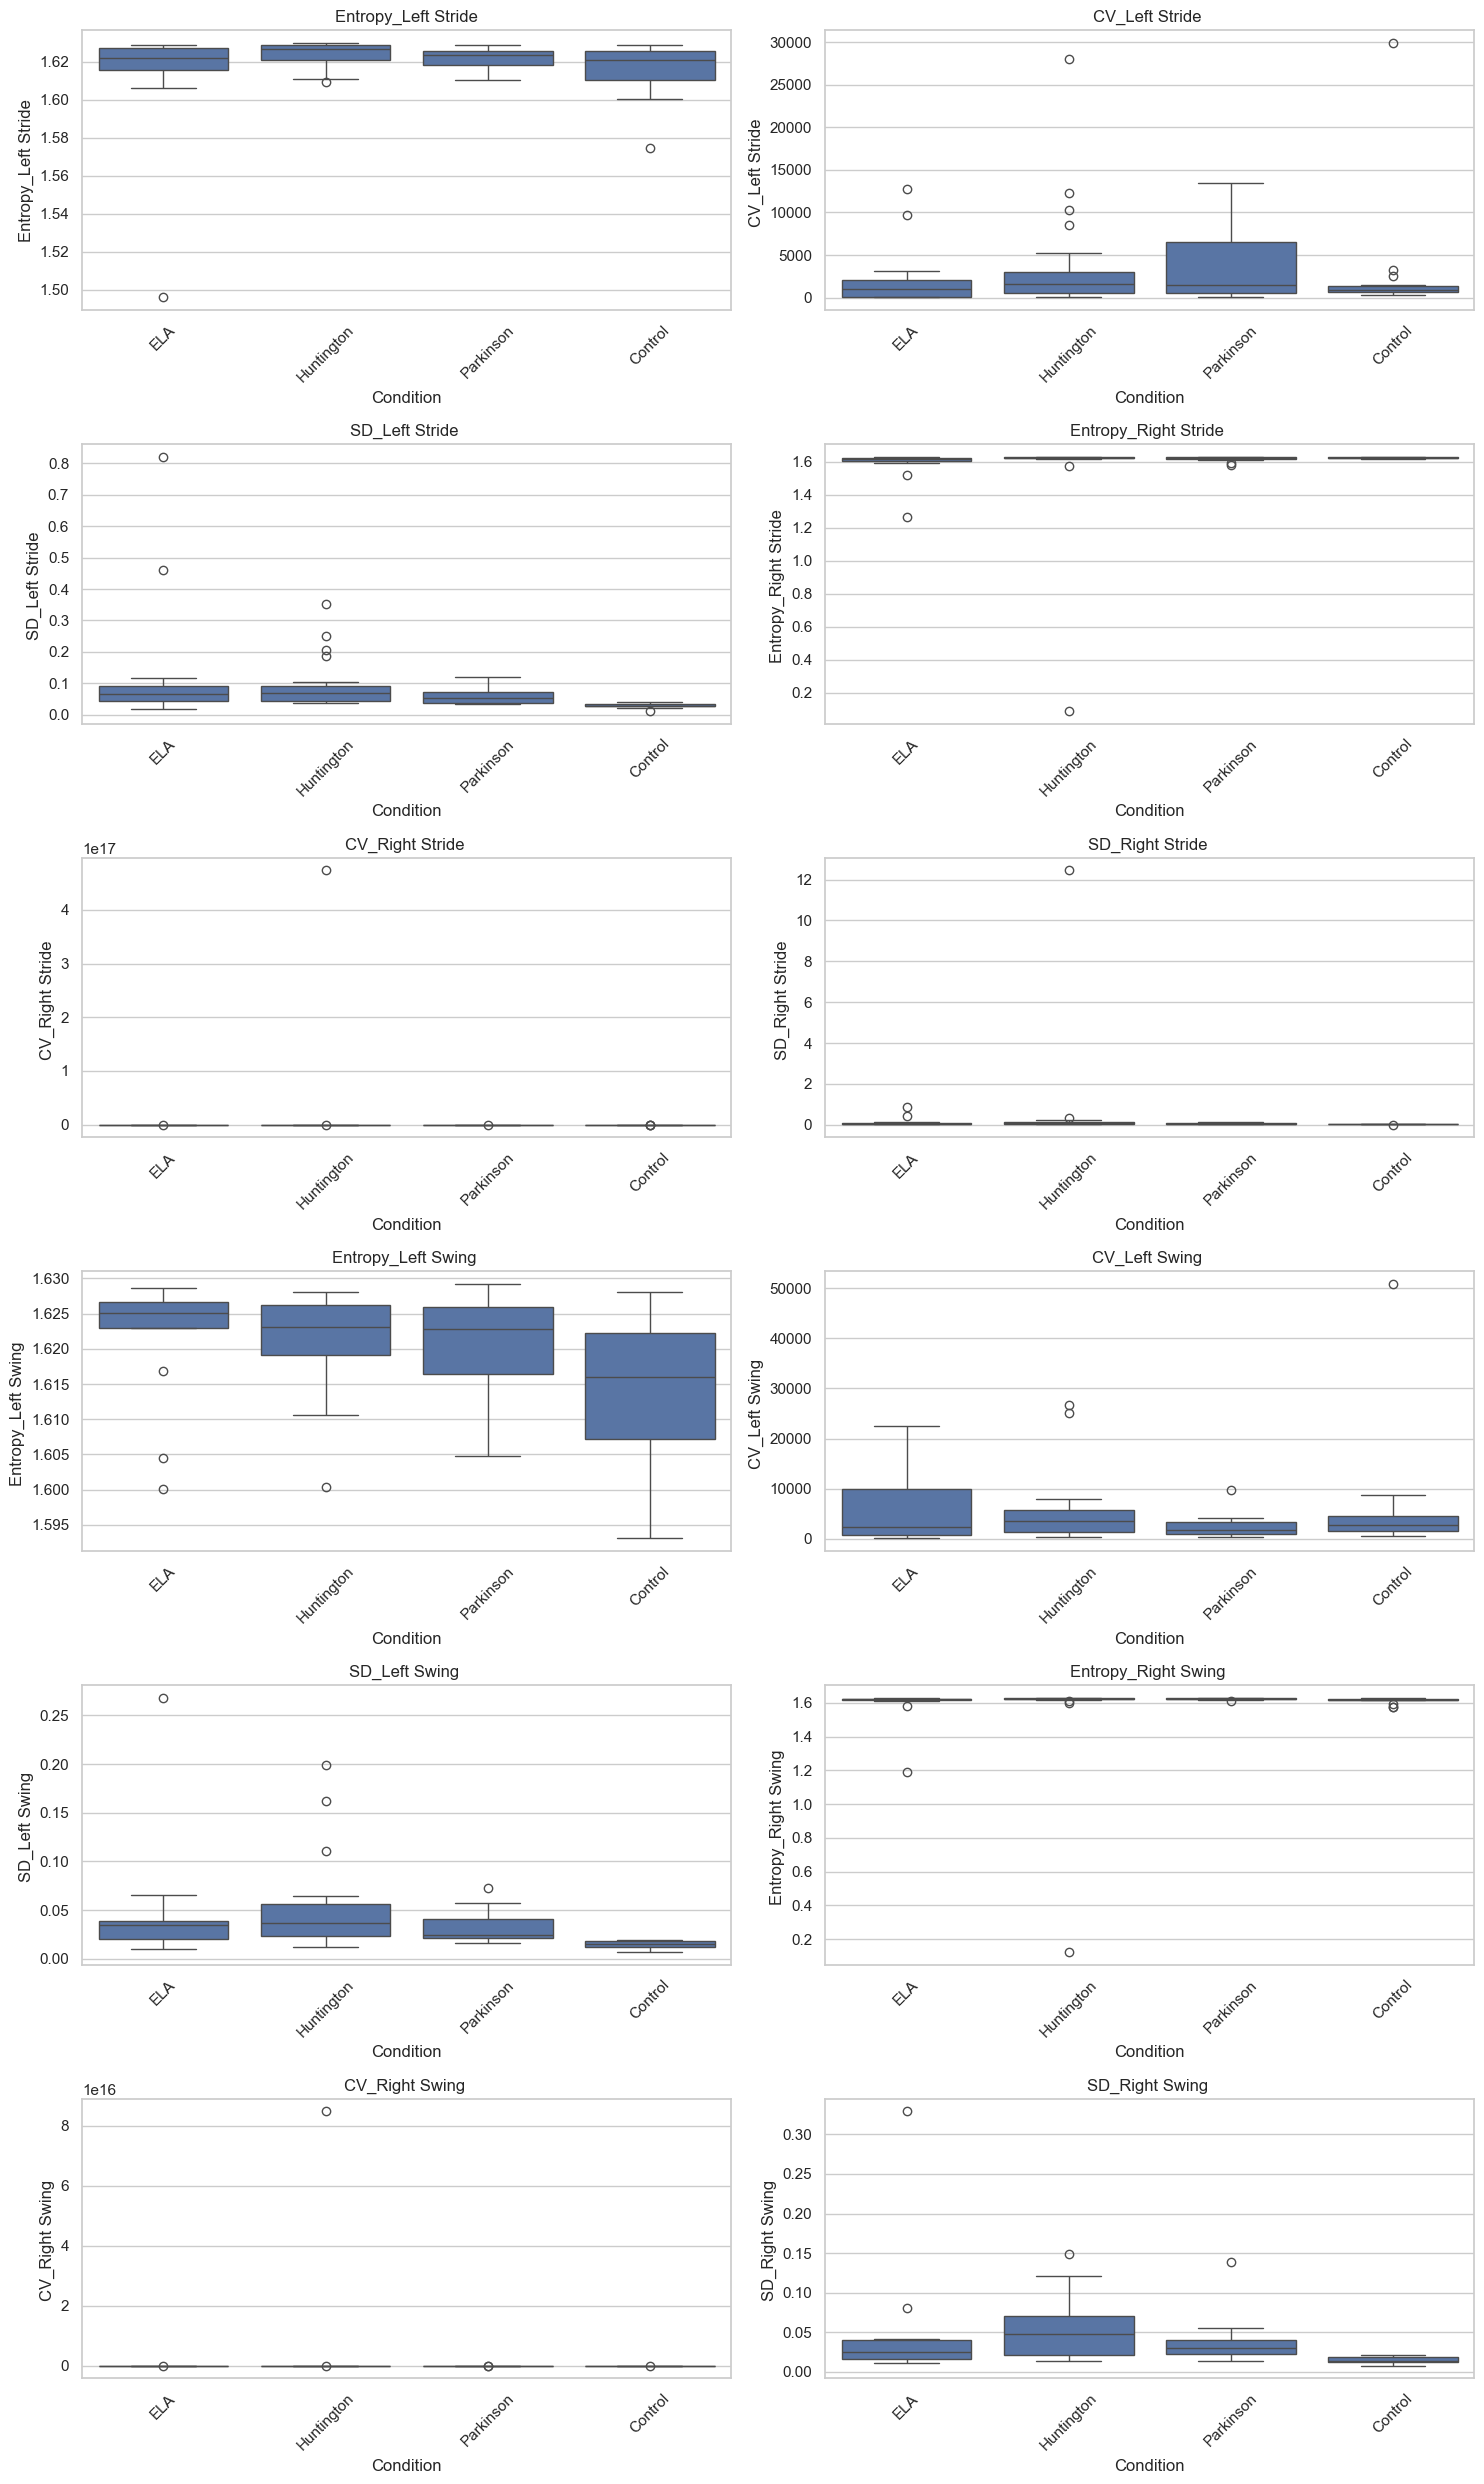

In [93]:
import seaborn as sns


# Concatenar todos los dataframes
df_total = pd.concat([df_ela, df_hunt, df_park, df_control], ignore_index=True)

# Seleccionar columnas de interés para graficar
columnas_interes = [
    'Entropy_Left Stride', 'CV_Left Stride ', 'SD_Left Stride ',
    'Entropy_Right Stride ', 'CV_Right Stride ', 'SD_Right Stride ',
    'Entropy_Left Swing ', 'CV_Left Swing ', 'SD_Left Swing ',
    'Entropy_Right Swing ', 'CV_Right Swing ', 'SD_Right Swing '
]


plt.figure(figsize=(15, 25))  
for i, columna in enumerate(columnas_interes, 1):
    plt.subplot(6, 2, i)  # 6 filas, 2 columnas de gráficos
    sns.boxplot(x='Condition', y=columna, data=df_total)
    plt.title(columna)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## En la siguiente gráfica se han omitido los outliers para una mejor visualización:

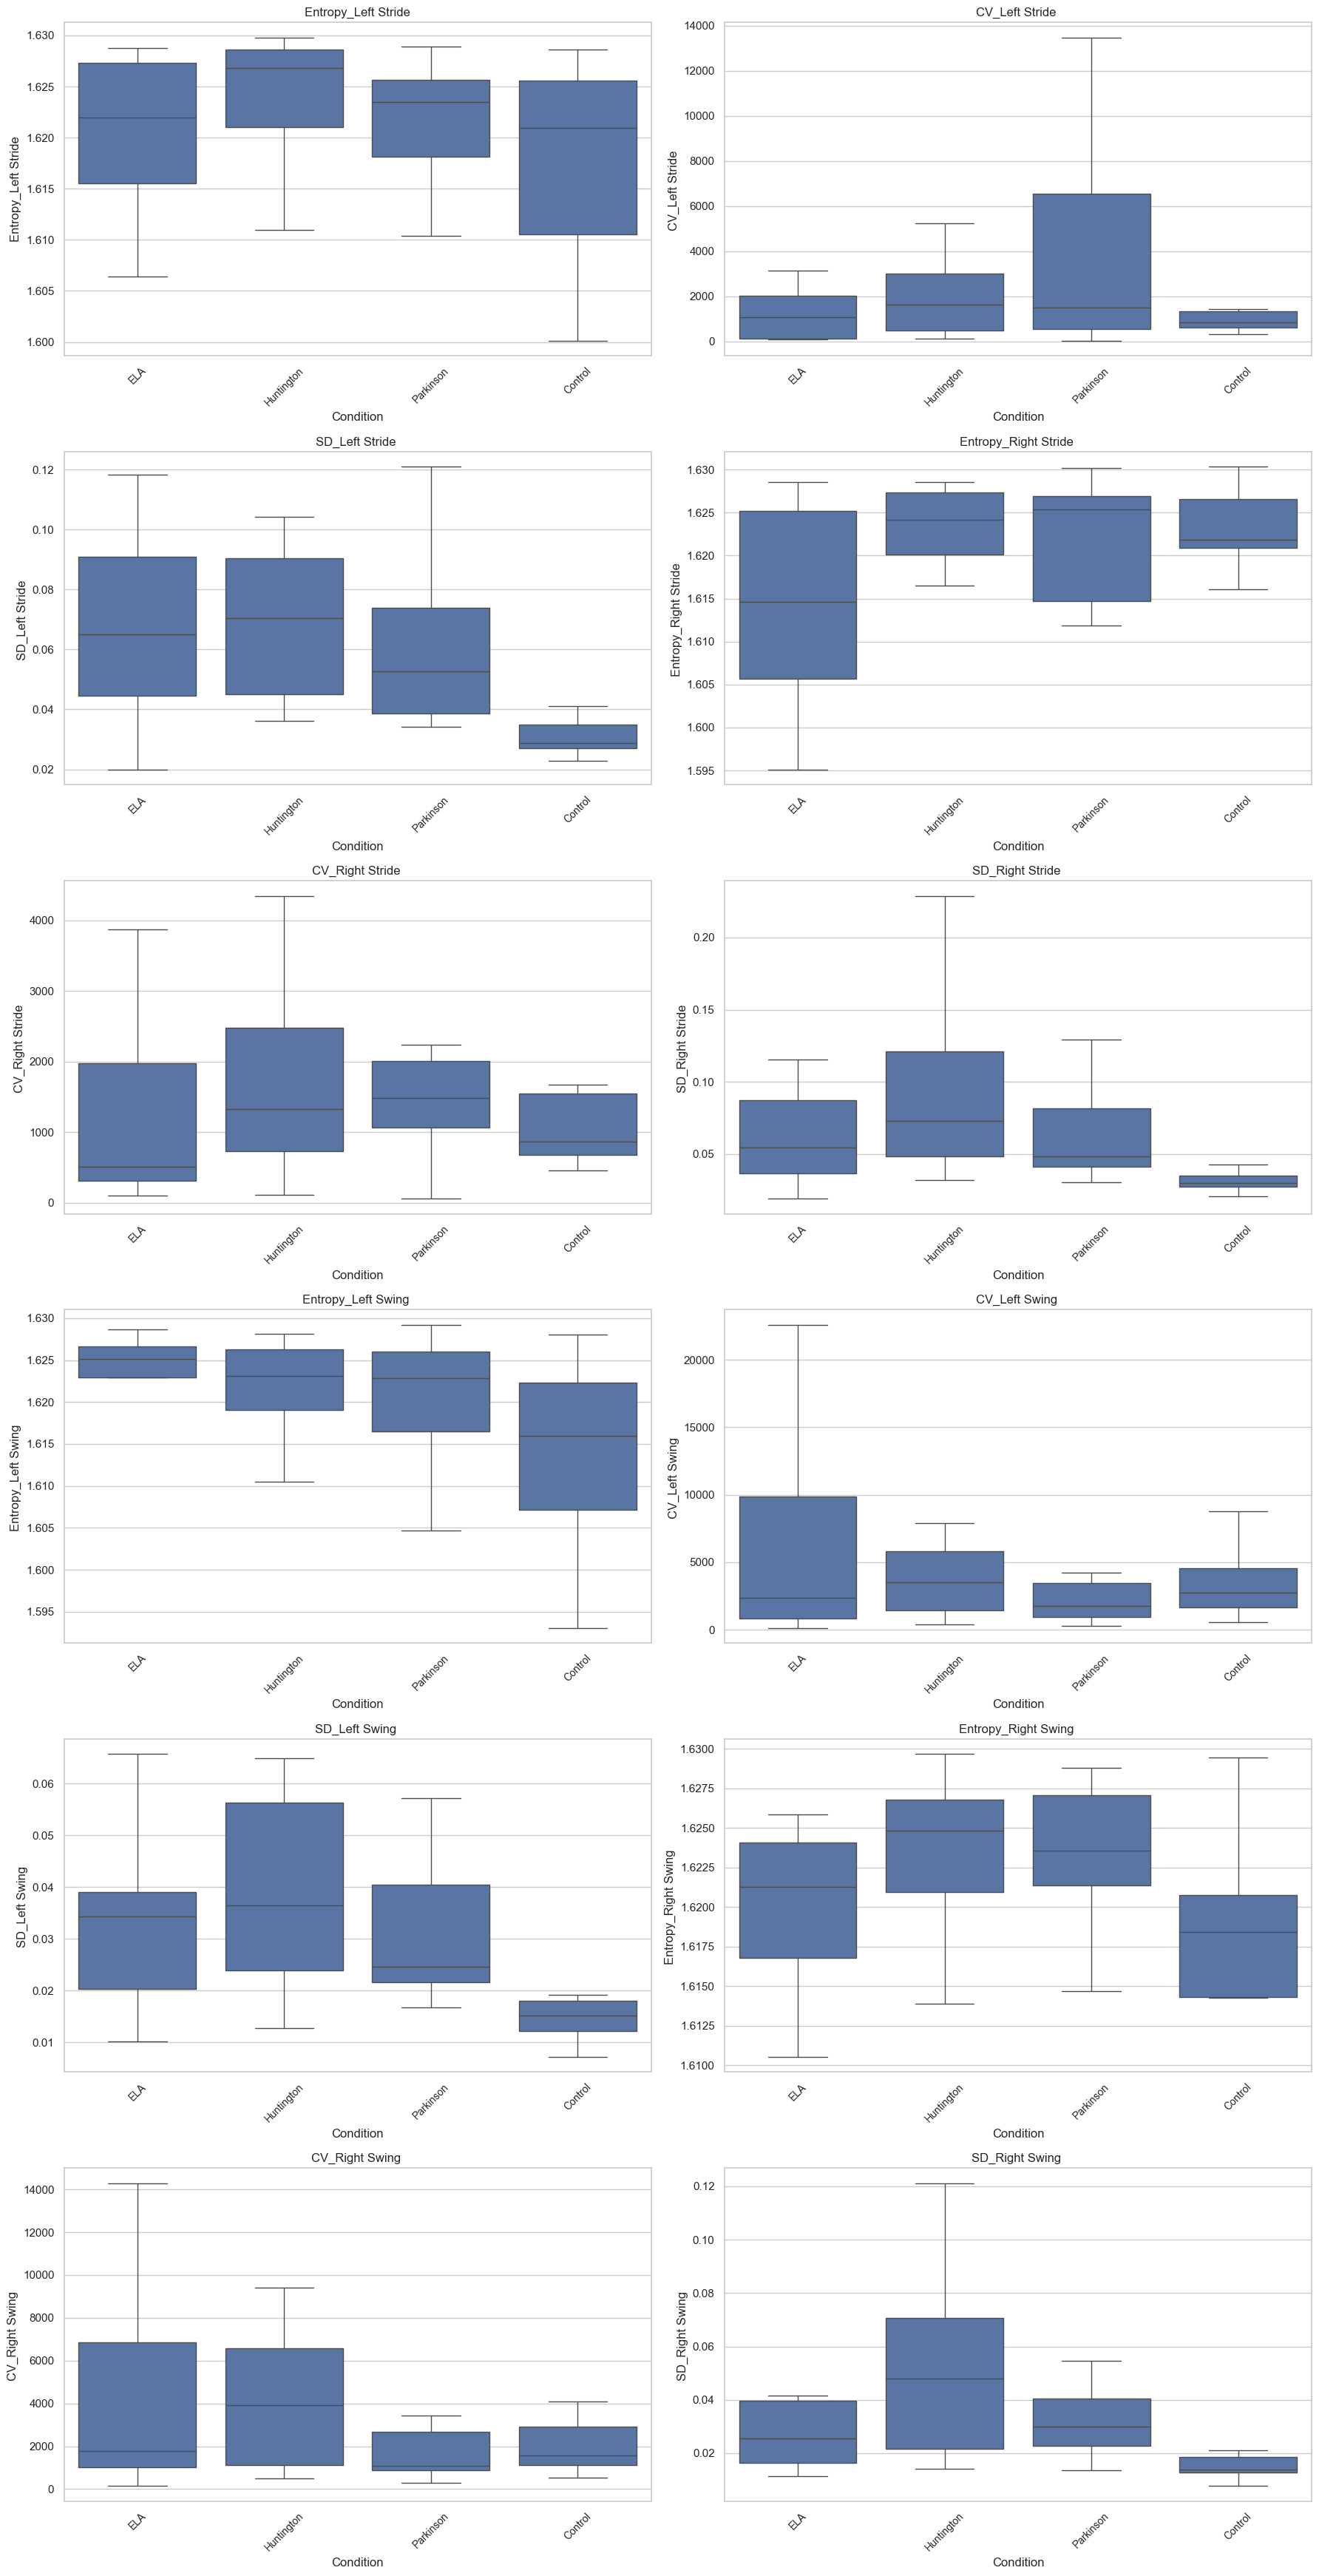

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear las gráficas eliminando los outliers
plt.figure(figsize=(18, 35))
for i, columna in enumerate(columnas_interes, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x='Condition', y=columna, data=df_total, showfliers=False)  # Sin outliers
    plt.title(columna, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()


# INFORME

### a. Discusión de las diferencias en los grupos usando las gráficas obtenidas usando estadística descriptiva 

En este estudio, se analizaron las señales de marcha de pacientes con enfermedades neurodegenerativas ELA , Huntington, Parkinson y muestra de Control (pacientes Sanos) , cada una enfocada en cuatro métricas: el Intervalo de Zancada Izquierda (Left Stride Interval), el Intervalo de Zancada Derecha (Right Stride Interval), el Intervalo de Balanceo Izquierdo (Left Swing Interval) y el Intervalo de Balanceo Derecho (Right Swing Interval). Al aplicar la rutina detrend, se eliminó la tendencia a largo plazo de las señales, como por ejemplo en la siguiente grafica. 

- Al observar la grafica se identifica una notable disminución con el uso de Detrended La línea fluctúa en torno a cero, mostrando solo la variabilidad real de las medidas de marcha de manera lineal. Las gráficas permiten visualizar la diferencia entre las señales originales y sus versiones detrended. Una separación clara sugiere que las personas en el grupo de control presentaron una marcha más consistente y predecible. Lo que puede indicar un buen control del motor y una capacidad para mantener un patrón de marcha regular, característico en individuos sin trastornos. También se observa que los picos con más picos nos indica un patrón de marcha más controlado y predecible, mientras que los picos más separados pueden reflejar variabilidad y potenciales problemas en el control del movimiento por ejemplo en el caso de ELA en comparación a control son más variables y a través del tiempo más separados indicando una mayor inestabilidad en la marcha.

- CV y SD : En las gráficas de CV y SD de las variables de Stride y Swing, parece haber una mayor variabilidad en los sujetos con Parkinson y ELA, lo que sugiere que estas dos condiciones podrían afectar de manera más significativa el control del movimiento. Los valores atípicos también sugieren que algunos individuos tienen un control motor mucho más inestable.

- Entropía : Las gráficas de entropía muestran que Huntington y ELA tienden a tener mayor variabilidad, lo que podría estar relacionado con el deterioro neuromuscular en estas condiciones. Control y Parkinson parecen tener una menor variabilidad en la entropía, lo cual es interesante, ya que podrías esperar una mayor variabilidad en Parkinson debido a los síntomas motores.
- Finalmente en la gráfica de entropía de permutación por grupo, se observa una clara diferenciación en los niveles de complejidad de las señales de marcha entre los grupos de ELA, Huntington, Parkinson y los sujetos Control (sanos). Las entropías más altas encontradas en el grupo de ELA sugieren una mayor variabilidad poca regularidad y una pérdida de complejidad en las señales de marcha, lo que podría reflejar la rigidez y deterioro del control motor característicos de esta enfermedad. Los grupos de Huntington y Parkinson también presentan entropías relativamente variables, aunque ligeramente menos elevadas que ELA, lo que puede indicar cierta preservación del control motor, aunque aún con una significativa reducción de la variabilidad respecto a los controles.


### b. Planteamiento de las hipótesis nulas y alternativas , selección del tipo de prueba (paramétrica o no paramétrica)  y discusión de los resultados 


# Hipotesis 

## Hipótesis sobre la entropía de permutación:

- Hipótesis nula (H0): La entropía de permutación de las señales de marcha no muestra diferencias significativas entre los pacientes con Parkinson, Huntington, ELA y los sujetos control.
- Hipótesis alternativa (H1): La entropía de permutación de las señales de marcha muestra diferencias significativas entre los pacientes con Parkinson, Huntington, ELA y los sujetos control.

## Hipótesis sobre la diferencia entre las patologías:

- Hipótesis nula (H0): No hay diferencias significativas en los datos entre los pacientes con diferentes enfermedades neurodegenerativas.
- Hipótesis alternativa (H1): Existen diferencias significativas en los datos de la marcha entre los pacientes con diferentes enfermedades neurodegenerativas (Parkinson, Huntington y ELA).

## Hipotesis sobre la diferencia del coeficiente de Variación CV
- Hipótesis nula (H0): No hay diferencias significativas entre los grupos (ELA, Huntington, Parkinson, Control) en la variable en cuestión.
- Hipótesis alternativa (H1): Hay diferencias significativas entre los grupos en la variable en cuestión
## Hipotesis sobre la diferencia del coeficiente de Desviación Estandar SD
- Hipótesis nula (H0): No hay diferencias significativas entre los grupos (ELA, Huntington, Parkinson, Control) en la variable en cuestión.
- Hipótesis alternativa (H1): Hay diferencias significativas entre los grupos en la variable en cuestión



# Selección de Tipo de Prueba 
## Verificacion de la normailidad 

In [95]:
dataframes = {
    "Control": df_control,
    "ELA": df_ela,
    "Huntington": df_hunt,
    "Parkinson": df_park
}

def normalidad(dataframes):
    resultados = []

    for df_name, df in dataframes.items():
        # Seleccionar solo las columnas numéricas
        columnas_numericas = df.select_dtypes(include=['float64', 'int64'])

        for columna in columnas_numericas.columns:
            estadistico_norm, p_valor_norm = shapiro(df[columna])
            normalidad = "Se rechaza H0" if p_valor_norm <= 0.05 else "No se rechaza H0"
            resultados.append({
                "DataFrame": df_name,
                "Columna": columna,
                "Estadístico": estadistico_norm,
                "p-valor": p_valor_norm,
                "Normalidad": normalidad
            })

    resultados_df = pd.DataFrame(resultados)
    return resultados_df

def homocedasticidad(dataframes):
    resultados_homocedasticidad = []

    nombres_columnas = dataframes[list(dataframes.keys())[0]].select_dtypes(include=['float64', 'int64']).columns

    # Realizar la prueba de homocedasticidad (Levene) para cada columna
    for columna in nombres_columnas:
        grupos = [dataframes[df_name][columna] for df_name in dataframes.keys() if columna in dataframes[df_name]]
        estadistico_levene, p_valor_levene = levene(*grupos)
        homocedasticidad = "Se rechaza H0" if p_valor_levene <= 0.05 else "No se rechaza H0"
        resultados_homocedasticidad.append({
                "Columna": columna,
                "Estadístico de Levene": estadistico_levene,
                "p-valor": p_valor_levene,
                "Homocedasticidad": homocedasticidad
            })
    resultados_homocedasticidad_df = pd.DataFrame(resultados_homocedasticidad)
    return resultados_homocedasticidad_df





In [96]:
resultados_normalidad = normalidad(dataframes)
print(resultados_normalidad)

     DataFrame                Columna  Estadístico       p-valor        Normalidad
0      Control    Entropy_Left Stride     0.798053  2.566384e-03     Se rechaza H0
1      Control        CV_Left Stride      0.357866  1.732507e-07     Se rechaza H0
2      Control        SD_Left Stride      0.942867  3.856290e-01  No se rechaza H0
3      Control  Entropy_Right Stride      0.946135  4.310384e-01  No se rechaza H0
4      Control       CV_Right Stride      0.653800  5.460278e-05     Se rechaza H0
5      Control       SD_Right Stride      0.962175  7.013866e-01  No se rechaza H0
6      Control    Entropy_Left Swing      0.941233  3.643979e-01  No se rechaza H0
7      Control         CV_Left Swing      0.433502  6.257565e-07     Se rechaza H0
8      Control         SD_Left Swing      0.943526  3.944709e-01  No se rechaza H0
9      Control   Entropy_Right Swing      0.746238  5.725420e-04     Se rechaza H0
10     Control        CV_Right Swing      0.573571  9.212949e-06     Se rechaza H0
11  

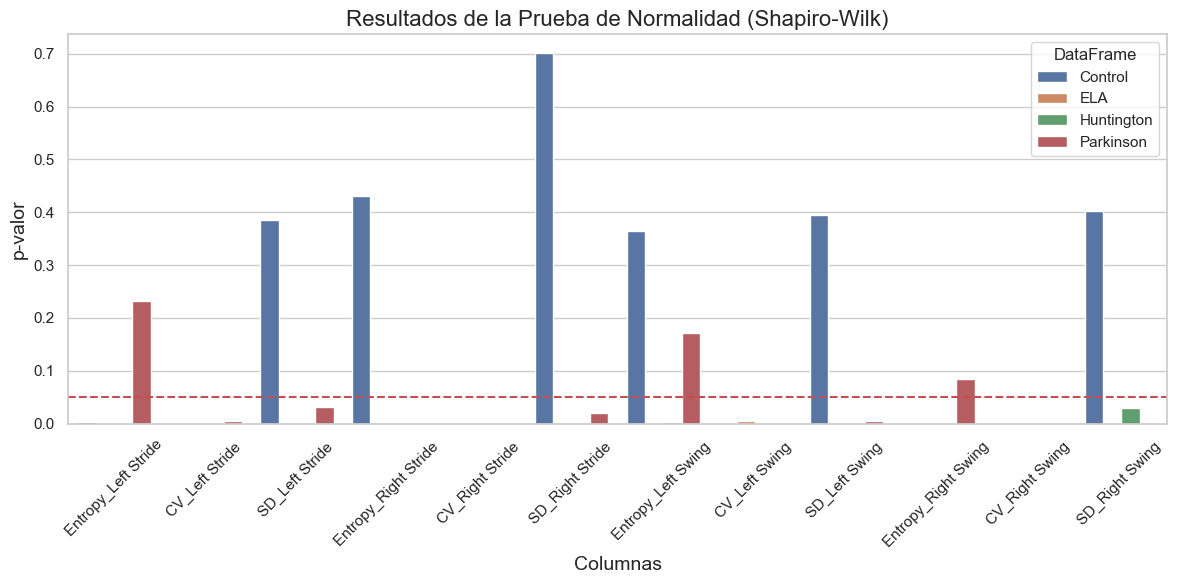

In [97]:
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=resultados_normalidad, x='Columna', y='p-valor', hue='DataFrame', errorbar=None)

# línea de referencia en p-valor = 0.05
plt.axhline(y=0.05, color='r', linestyle='--')

plt.title('Resultados de la Prueba de Normalidad (Shapiro-Wilk)', fontsize=16)
plt.ylabel('p-valor', fontsize=14)
plt.xlabel('Columnas', fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas de columnas para mejor legibilidad

# Mostrar leyenda
plt.legend(title='DataFrame')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Barras por debajo de 0.05: Indican que la variable correspondiente no sigue una distribución normal (rechazo de H0).
Barras por encima de 0.05: Indican que la variable correspondiente puede seguir una distribución normal (no se rechaza H0).

Se identifican que Ela y Huntington son quienes en sus variables no siguen una distribución normal, Mientras que Parkinsón especialmente en la Entropia y Pacientes de Control en CV y SD.  

In [98]:
resultados_homocedasticidad = homocedasticidad(dataframes)
print(resultados_homocedasticidad)

                  Columna  Estadístico de Levene   p-valor  Homocedasticidad
0     Entropy_Left Stride               1.308680  0.279929  No se rechaza H0
1         CV_Left Stride                0.171902  0.914975  No se rechaza H0
2         SD_Left Stride                2.534958  0.065242  No se rechaza H0
3   Entropy_Right Stride                0.611649  0.610079  No se rechaza H0
4        CV_Right Stride                0.723684  0.541805  No se rechaza H0
5        SD_Right Stride                0.751223  0.525941  No se rechaza H0
6     Entropy_Left Swing                1.590605  0.201042  No se rechaza H0
7          CV_Left Swing                0.670199  0.573660  No se rechaza H0
8          SD_Left Swing                2.210990  0.096068  No se rechaza H0
9    Entropy_Right Swing                0.559877  0.643573  No se rechaza H0
10        CV_Right Swing                0.723684  0.541805  No se rechaza H0
11        SD_Right Swing                1.971773  0.127822  No se rechaza H0

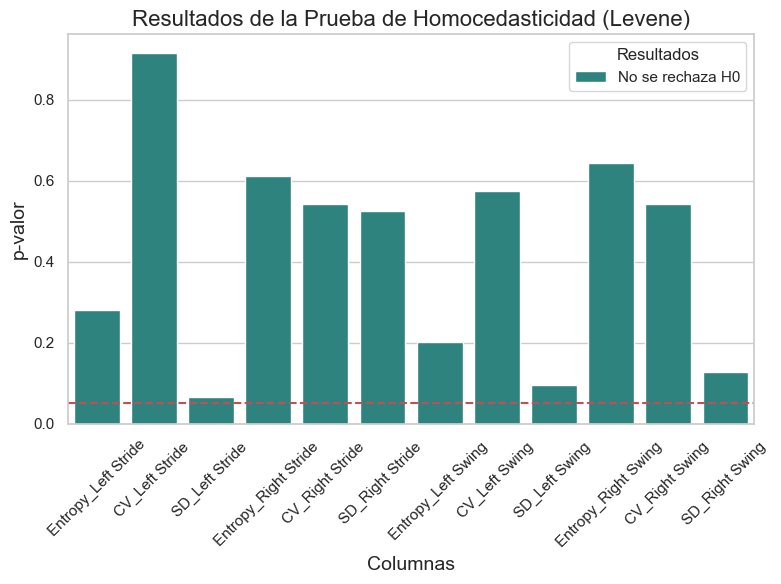

In [99]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=resultados_homocedasticidad, x='Columna', y='p-valor', hue='Homocedasticidad', palette='viridis')

# Añadir línea de referencia en p-valor = 0.05
plt.axhline(y=0.05, color='r', linestyle='--')

plt.title('Resultados de la Prueba de Homocedasticidad (Levene)', fontsize=16)
plt.ylabel('p-valor', fontsize=14)
plt.xlabel('Columnas', fontsize=14)
plt.xticks(rotation=45)

# Mostrar leyenda
plt.legend(title='Resultados')

# Mostrar la gráfica
plt.tight_layout()
plt.show()



Generalmente se muestra que las variancias de los grupos son iguales en la mayoria de las variables, lo que sugiere que no hay diferencias significativas en la dispersión de los datos. Pero los resultados se diferencian mas en la desviación estandar(SD)  

### CONCLUSION PRUEBAS NORMALIDAD Y HOMOSTESIDAD
 Las pruebas paramétricas son apropiadas únicamente para las variables de SD y CV en CONTROL  y la Variable de entropia para Parkinson , estos datos mostraron p-valores superiores a 0.05 en la prueba de normalidad, lo que indica que sus datos se distribuyen de manera normal y, por lo tanto, cumplen con uno de los supuestos fundamentales de las pruebas paramétricas. Por otro lado, los grupos de ELA y Huntington no cumplen con este supuesto, ya que sus p-valores fueron inferiores a 0.05, sugiriendo que sus distribuciones no son normales y ademas tener presente las demas variables de Parkinson CV y SD, y entropia para Control. Especialmente en el grupo de ELA los datos no normales relacionados con el coeficiente de variación (CV) sugiere un aumento en la inestabilidad de la marcha.

- Normalidad:
        Se rechazó la hipótesis nula (H0) de normalidad en la mayoría de las pruebas.
        Se aceptó H0 (normalidad) en algunas columnas, pero principalmente, se rechazó en muchas.

 la prueba de leave indica la homocedasticidad , segun los resultados no se rechaza, existe homocedasticidad ( varianzas son iguales), por lo tanto en terminos de homocedasticidad se podria usar una prueba paramétrica, pero se tiene encuentas que no todas estas variables cumplen con el supuesto de normalidad. 

- Homocedasticidad:
     La mayoría de las pruebas mostraron que no se rechazaba H0, indicando que la homocedasticidad se mantuvo.




Se usan pruebas no Parametricas para los resultados que no mostraron Normalidad.

## Prueba no parametrica Control vs ELA

In [102]:
import pandas as pd
from scipy.stats import mannwhitneyu

print('Control vs ELA Prueba no paramétrica')
columnas_a_analizar = [
    'Entropy_Left Stride', 'CV_Left Stride', 'SD_Left Stride',
    'Entropy_Right Stride', 'CV_Right Stride', 'SD_Right Stride',
    'Entropy_Left Swing', 'CV_Left Swing', 'SD_Left Swing',
    'Entropy_Right Swing', 'CV_Right Swing', 'SD_Right Swing'
]

df_ela.columns = df_ela.columns.str.strip()
df_control.columns = df_control.columns.str.strip()

resultados = []  # Almacena resultados

for columna in columnas_a_analizar:
    # Verificar si la columna existe en ambos DataFrames
    if columna in df_ela.columns and columna in df_control.columns:
        # Extraer los datos de los grupos específicos, eliminando valores nulos
        ela_data = df_ela[columna].dropna()
        control_data = df_control[columna].dropna()

        # Verificar si hay suficientes datos para la prueba
        if len(ela_data) > 0 and len(control_data) > 0:
            # Prueba de Mann-Whitney U
            stat, p_value = mannwhitneyu(ela_data, control_data, alternative='two-sided')
            
            # Almacenar los resultados
            resultados.append({
                'Columna': columna,
                'Estadístico U': stat,
                'p-valor': p_value
            })
        else:
            print(f"No hay suficientes datos para realizar la prueba en la columna: {columna}")
    else:
        print(f"La columna '{columna}' no existe en uno de los DataFrames.")

resultados_df = pd.DataFrame(resultados) #Dataframe resultados

# Mostrar resultados
print(resultados_df.to_string(index=False))

# Interpretar resultados
alpha = 0.05  # Nivel de significancia
for index, row in resultados_df.iterrows():
    if row['p-valor'] < alpha:
        print(f"Se rechaza la hipótesis nula para {row['Columna']}: hay diferencias significativas.")
    else:
        print(f"No se rechaza la hipótesis nula para {row['Columna']}: no hay diferencias significativas.")



Control vs ELA Prueba no paramétrica
             Columna  Estadístico U  p-valor
 Entropy_Left Stride          116.0 0.614045
      CV_Left Stride           99.0 0.843563
      SD_Left Stride          174.0 0.002305
Entropy_Right Stride           62.0 0.068775
     CV_Right Stride           75.0 0.211370
     SD_Right Stride          175.0 0.001991
  Entropy_Left Swing          145.0 0.075726
       CV_Left Swing           99.0 0.843563
       SD_Left Swing          170.0 0.004074
 Entropy_Right Swing          124.0 0.392478
      CV_Right Swing          114.0 0.676969
      SD_Right Swing          161.0 0.013224
No se rechaza la hipótesis nula para Entropy_Left Stride: no hay diferencias significativas.
No se rechaza la hipótesis nula para CV_Left Stride: no hay diferencias significativas.
Se rechaza la hipótesis nula para SD_Left Stride: hay diferencias significativas.
No se rechaza la hipótesis nula para Entropy_Right Stride: no hay diferencias significativas.
No se rechaza la hipó

 Los resultados para Ela vs Control indican que hay diferencias significativas en las métricas de variabilidad (SD) hay dispersion en los datos de las zancadas (tanto izquierda como derecha) y las oscilaciones (izquierda y derecha) entre los pacientes con ELA y los controles pacientes sanos. Esto sugiere que los pacientes con ELA muestran un control de marcha menos estable.

## Prueba no parametrica ELA vs Huntington

In [65]:

resultados = []  # Almacena los resultados

# Iterar sobre cada columna
for columna in columnas_a_analizar:
    # Extraer los datos de los grupos ELA y Huntington, eliminando valores nulos
    ela_data = df_ela[columna].dropna()
    hunt_data = df_hunt[columna].dropna()
    
    # Prueba de Mann-Whitney U
    stat, p_value = mannwhitneyu(ela_data, hunt_data, alternative='two-sided')
    
    # Almacenar los resultados
    resultados.append({
        'Columna': columna,
        'Estadístico U': stat,
        'p-valor': p_value
    })

# Crear un DataFrame para mostrar los resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar resultados
print(resultados_df)

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
for index, row in resultados_df.iterrows():
    if row['p-valor'] < alpha:
        print(f"Se rechaza la hipótesis nula para {row['Columna']}: hay diferencias significativas entre ELA y Huntington.")
    else:
        print(f"No se rechaza la hipótesis nula para {row['Columna']}: no hay diferencias significativas entre ELA y Huntington.")


                 Columna  Estadístico U   p-valor
0    Entropy_Left Stride           93.0  0.178690
1         CV_Left Stride          101.0  0.293696
2         SD_Left Stride          121.0  0.754150
3   Entropy_Right Stride           87.0  0.117381
4        CV_Right Stride           84.0  0.093661
5        SD_Right Stride          110.0  0.472477
6     Entropy_Left Swing          146.0  0.567946
7          CV_Left Swing          123.0  0.810730
8          SD_Left Swing          103.0  0.328886
9    Entropy_Right Swing           83.0  0.086669
10        CV_Right Swing          118.0  0.671782
11        SD_Right Swing           85.0  0.101099
No se rechaza la hipótesis nula para Entropy_Left Stride: no hay diferencias significativas entre ELA y Huntington.
No se rechaza la hipótesis nula para CV_Left Stride: no hay diferencias significativas entre ELA y Huntington.
No se rechaza la hipótesis nula para SD_Left Stride: no hay diferencias significativas entre ELA y Huntington.
No se rechaz

Los resultados de la prueba de Mann-Whitney U indican que no hay diferencias significativas entre los pacientes con ELA y los pacientes con Huntington en ninguna de las métricas analizadas (entropía, coeficiente de variación y desviación estándar en las zancadas y oscilaciones). Los patrones de marcha entre ambos grupos son similares.

## Prueba no Parametrica Parkinson y Control 

In [66]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Definir las columnas a analizar
columnas_a_analizar = [
    'Entropy_Left Stride', 'CV_Left Stride', 'SD_Left Stride',
    'Entropy_Right Stride', 'CV_Right Stride', 'SD_Right Stride',
    'Entropy_Left Swing', 'CV_Left Swing', 'SD_Left Swing',
    'Entropy_Right Swing', 'CV_Right Swing', 'SD_Right Swing'
]

resultados = []  # Almacena resultados

# Iterar sobre cada columna
for columna in columnas_a_analizar:
    # Extraer los datos de los grupos específicos, eliminando valores nulos
    park_data = df_park[columna].dropna()
    control_data = df_control[columna].dropna()
    
    # Prueba de Mann-Whitney U
    stat, p_value = mannwhitneyu(park_data, control_data, alternative='two-sided')
    
    # Almacenar los resultados
    resultados.append({
        'Columna': columna,
        'Estadístico U': stat,
        'p-valor': p_value
    })

# Crear un DataFrame para mostrar los resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar resultados
print(resultados_df)

# Interpretar resultados
alpha = 0.05  # Nivel de significancia
for index, row in resultados_df.iterrows():
    if row['p-valor'] < alpha:
        print(f"Se rechaza la hipótesis nula para {row['Columna']}: hay diferencias significativas entre Parkinson y Control.")
    else:
        print(f"No se rechaza la hipótesis nula para {row['Columna']}: no hay diferencias significativas entre Parkinson y Control.")


                 Columna  Estadístico U   p-valor
0    Entropy_Left Stride          143.0  0.373793
1         CV_Left Stride          141.0  0.417748
2         SD_Left Stride          222.0  0.000060
3   Entropy_Right Stride          125.0  0.858819
4        CV_Right Stride          138.0  0.489095
5        SD_Right Stride          223.0  0.000051
6     Entropy_Left Swing          165.0  0.078575
7          CV_Left Swing           87.0  0.198906
8          SD_Left Swing          230.0  0.000015
9    Entropy_Right Swing          176.0  0.028248
10        CV_Right Swing          104.0  0.540080
11        SD_Right Swing          226.0  0.000030
No se rechaza la hipótesis nula para Entropy_Left Stride: no hay diferencias significativas entre Parkinson y Control.
No se rechaza la hipótesis nula para CV_Left Stride: no hay diferencias significativas entre Parkinson y Control.
Se rechaza la hipótesis nula para SD_Left Stride: hay diferencias significativas entre Parkinson y Control.
No se rec

La mayor variabilidad en las métricas de SD en los pacientes con Parkinson en comparación con los controles sugiere que estos pacientes tienen un control de marcha menos estable, mientras que Las diferencias significativas en la entropía  indican que hay variaciones en cómo los pacientes con Parkinson oscilan su cuerpo durante la marcha.

### C. Discutir los resultados obtenidos con los presentado en el artículo base (10%) 

El artículo base se investiga cómo la esclerosis lateral amiotrófica (ELA) afecta el ritmo de marcha, planteando la hipótesis de que los sujetos con ELA mostrarían un aumento en la inestabilidad de la marcha en comparación con controles sanos y pacientes con enfermedades como el Parkinson y la Huntington. Utilizando un registrador en el tobillo, los autores midieron la duración de cada zancada y las fluctuaciones entre zancadas, encontrando que los sujetos con ELA presentan una  velocidad de marcha inferior, un tiempo de zancada significativamente más largo y una mayor variabilidad lo que indica una marcha menos estable en comparación con los controles sanos. Por lo tanto se sugiere que desarrollar marcadores basados en la dinámica de la marcha podría ser útil para caracterizar patologías del sistema motor y evaluar intervenciones terapéuticas.

Se concluye en el artículo base que los resultados sugieren que el tiempo de zancada podría servir como un indicador de la gravedad de la enfermedad en pacientes con ELA, En contraste, nuestros resultados muestran que, al programar las señales, los sujetos con ELA, Huntington y Parkinson mostraron un rechazo sistemático de la hipótesis nula de normalidad, indicando diferencias significativas en comparación con los controles, Especialmente en ELA lo cual respalda inestabilidad en la marcha contra los demas datos. 

- SD_Left Stride, SD_Right Stride, SD_Left Swing, SD_Right Swing mostraron diferencias significativas entre los grupos, indicando que la variabilidad en la marcha es una medida clave donde se observan cambios en pacientes con ELA en comparación con los controles.


### d. Proponer cuales de las medidas usadas podrían servir para discriminar que poblaciones clínicas de los controles (10%)

Basados en los resultados de las medidas usadas para discriminar entre las poblaciones clínicas de ELA, Huntington y Parkinson de los controles, consideramos las medidas que muestran diferencias significativas como 

- Desviacion estandar (SD) En pacientes con ELA, se observó que la desviación estándar (SD) del Left Stride y Right Stride es mayor que en los controles, lo que sugiere un incremento en la inestabilidad de su marcha. De manera similar, los pacientes con Huntington también presentaron una SD significativamente diferente, indicando una mayor variabilidad en su patrón de marcha en Ela que en Huntington.  En el caso de los pacientes con Parkinson, la SD del Left Swing y Right Swing mostró diferencias significativas en comparación con los controles, lo que refuerza la idea de que estos pacientes exhiben un patrón de marcha más variable.

- Coeficiente de Variación (CV)
En ELA, el CV de Left Stride y Right Stride indica una mayor relación entre la variabilidad y la media de los pasos, sugiriendo un impacto significativo de su condición clínica. En Huntington, se encontraron diferencias significativas en el CV de varios parámetros, reflejando patrones de marcha distintos. En Parkinson, el CV de Left Swing y Right Swing mostró diferencias significativas, indicando que su marcha es más variable en comparación con los controles.

-  Entropía especialmente en Parkinson La entropía del Left Stride y Right Stride mostró diferencias en comparación con los controles. Los datos mostraron mas similitud en su distribucion para la prueba de normalidad esto podría indicar un patrón de marcha más predecible y menos dinámico. 


#### CONCLUSIONES
- La evaluación de las diferencias en la marcha mediante estas métricas puede proporcionar información importante para comprender mejor los efectos de las enfermedades neurodegenerativas en la función motora, ideal para un buen diagnostico e intervención terapéutica a tiempo.
- Debido a la falta de normalidad en ciertos grupos, se sugiere considerar métodos no paramétricos para un análisis más Profundo. Es importante incluir y presentar los resultados de las pruebas de normalidad y homocedasticidad para justificar adecuadamente la elección entre pruebas paramétricas y no paramétricas. Esto fortalecerá la validez de las decisiones metodológicas.
- Los resultados que rechazan las hipótesis nulas tendrían importantes implicaciones clínicas, sugiriendo que las medidas de entropía de permutación, CV y SD son útiles para caracterizar y evaluar el impacto de las enfermedades neurodegenerativas en la marcha.
- La entropía de las variables de marcha en el grupo de Parkinson indica un patrón más predecible y menos dinámico en comparación con los 
controles.
- La identificación de patrones de marcha inestables puede guiar el desarrollo de intervenciones personalizadas en programas de rehabilitación para mejorar la estabilidad y la coordinación de cada paciente.




#### REFERENCIAS 
1. National Institute of Neurological Disorders and Stroke. (2024). Accelerating progress and narrowing gaps: Parkinson's disease awareness month 2024. https://www.ninds.nih.gov/news-events/directors-messages/all-directors-messages/parkinsons-disease-awareness-month-2024-accelerating-progress-and-narrowing-gaps?search-term=Enfermedad%20de%20Parkinson%20(EP)
2. National Institute of Neurological Disorders and Stroke. (n.d.). Huntington's disease. https://www.ninds.nih.gov/health-information/disorders/huntingtons-disease?search-term=Enfermedad%20de%20Huntington%20(EH)
3. Mavridis, I., Tzeng, R. J., & Samaras, T. (2024). Application of entropy in biomechanical signals: A review. Molecules, 25(18), 9966. https://doi.org/10.3390/molecules25189966 
4. ALS News Today. (2024). PrimeC shown to extend complication-free survival in ALS patients. https://alsnewstoday.com/news/primec-shown-extend-complication-free-survival-als-patients/
5. De, S. a. C. (n.d.). La columna de matemática computacional. Rsme.es. Recuperado el 21 de septiembre de 2024, de https://gaceta.rsme.es/abrir.php?id=1258#:~:text=(x)%20%3D%20n%20j
6. Hampel, F. R., Ronchetti, E. M., Rousseeuw, P. J., & Stahel, W. A. (2005). Front matter. In F. R. Hampel, E. M. Ronchetti, P. J. Rousseeuw, & W. A. Stahel (Eds.), Robust statistics. https://doi.org/10.1002/9781118186435.fmatter
7. AP Tech. (n.d.). Understanding permutation entropy and its applications. https://www.aptech.com/blog/permutation-entropy/
8. NCBI. (2021). Entropy and its role in biomedical signal processing. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8051436/

